In [1]:
import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt

from datetime import datetime
time1=datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                            #initial time starting of the runtime
#----------system parameters------------------------------
T=300.0                          #temparature in unit kelvin
eta=1e-3
a=2e-6                           #diameter of the probe sphere in meter

kb=1.38e-23                      #boltzman constant s.i unit
#Gp=2.2e-5                          #elastic modulus for both model Pa
#Gp=1000
#----------some constants determined from the above parameters
m=0.0                                     #mean of the random walk motion
#lamb=(etas/Gp)
#k=6*pi*(a/2)*Gp   

D = (kb*T)/(6*np.pi*eta*(a/2))

In [2]:
D

2.196338214668156e-13

In [3]:
A = D
alpha = -log(10)/1000
beta = 0

In [4]:
time = 0

time0=1200
time1=1800
time2=2400
time3=3000
time4=3600

In [5]:
(exp(alpha*(time0+50))-exp(alpha*time0))/exp(alpha*time0)

-0.10874906186625441

In [6]:
(exp(alpha*(time1+60))-exp(alpha*time1))/exp(alpha*time1)

-0.12903641004391894

In [7]:
(exp(alpha*(time2+60))-exp(alpha*time2))/exp(alpha*time2)

-0.12903641004391955

In [8]:
(exp(alpha*(time3+60))-exp(alpha*time3))/exp(alpha*time3)

-0.12903641004391883

In [9]:
A*exp(alpha*time0)

1.3857957275073881e-14

In [10]:
A*exp((alpha-beta)*time1)

3.4809614847697546e-15

In [11]:
A*exp((alpha-beta)*time2)

8.743779922200591e-16

In [12]:
A*exp((alpha-beta)*time3)

2.1963382146681547e-16

In [13]:
A*exp((alpha-beta)*time4)

5.516952160430911e-17

In [14]:
#---------body of the code---------------------------
xv0=1e-9                                #initial x cordinate in unit micro meter
yv0=8e-9                                  #initial y cordinate in unit micro meter
xarr_v0=[]                                #list of total x after ith step
yarr_v0=[]                                #list of total y after 
t_arr0=[]
xstep0_arr=[]

In [15]:
#---------body of the code---------------------------
xv=xv0
yv=yv0
xarr_v=xarr_v0
yarr_v=yarr_v0
t_arr=t_arr0
xstep_arr=xstep0_arr
time=time0
#D=1e-12

In [16]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [17]:
'''tau_t=0
tf = time+60                                #total time in unit second
t = time
dt=0
while t < tf:
    #--------------------maxwell part of the code--------
    #p=uniform(-4,0)
    dt=1e-3                            #linear distributed in 10 base logscale of time


    tau_t =1 #exp((alpha-beta)*time)
    tau_tt = exp(beta*t)
    tau_t_arr.append(tau_t)
    
    #---------------------voigt part of the code--------
    Ax=xv*exp(-(dt/lamb*tau_t))
    Bx=sqrt(((kb*T)/k*tau_tt)*(1-exp(-(2*dt/lamb*tau_t))))
    Bx_arr.append(Bx)
    Ax_arr.append(Ax)
    
    
    Ay=yv*exp(-(dt/lamb*tau_t))
    By=sqrt(((kb*T)/k*tau_tt)*(1-exp(-(2*dt/lamb*tau_t))))
    
    xstep=(gauss(Ax,Bx))
    xv=xv+xstep
    xarr_v.append(xv)
    
    xstep_arr.append(xstep)
    
    ystep=(gauss(Ay,By))
    yv=yv+ystep
    yarr_v.append(yv)
    
    t=t+dt
    t_arr.append(t)'''

'tau_t=0\ntf = time+60                                #total time in unit second\nt = time\ndt=0\nwhile t < tf:\n    #--------------------maxwell part of the code--------\n    #p=uniform(-4,0)\n    dt=1e-3                            #linear distributed in 10 base logscale of time\n\n\n    tau_t =1 #exp((alpha-beta)*time)\n    tau_tt = exp(beta*t)\n    tau_t_arr.append(tau_t)\n    \n    #---------------------voigt part of the code--------\n    Ax=xv*exp(-(dt/lamb*tau_t))\n    Bx=sqrt(((kb*T)/k*tau_tt)*(1-exp(-(2*dt/lamb*tau_t))))\n    Bx_arr.append(Bx)\n    Ax_arr.append(Ax)\n    \n    \n    Ay=yv*exp(-(dt/lamb*tau_t))\n    By=sqrt(((kb*T)/k*tau_tt)*(1-exp(-(2*dt/lamb*tau_t))))\n    \n    xstep=(gauss(Ax,Bx))\n    xv=xv+xstep\n    xarr_v.append(xv)\n    \n    xstep_arr.append(xstep)\n    \n    ystep=(gauss(Ay,By))\n    yv=yv+ystep\n    yarr_v.append(yv)\n    \n    t=t+dt\n    t_arr.append(t)'

In [18]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0

while t<tf:
    #--------------------maxwell part of the code
    p= -3 #uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [19]:
#min(Ax_arr)

In [20]:
Bx_arr

[-3.5838614818248006e-09,
 -1.3696644720478997e-09,
 1.6217685743200524e-09,
 -2.4799050319053795e-09,
 -4.269288536213024e-09,
 -9.501489403820334e-09,
 5.260782080932096e-09,
 1.0283260521075785e-09,
 4.834483422688666e-09,
 -3.771535283322644e-10,
 4.928587085725408e-10,
 -1.0562785807879628e-09,
 -2.708070968174659e-10,
 8.396542568322692e-09,
 -4.150216033592797e-09,
 -2.2964632567778827e-09,
 8.612276719471936e-09,
 5.667734439945183e-09,
 3.790543060774472e-09,
 5.528174933348878e-09,
 -2.24411927018145e-09,
 1.0199473844192025e-08,
 2.0735869279749616e-09,
 -2.3916371496645697e-09,
 -1.3691719268210463e-09,
 -5.228835984619751e-09,
 3.2755729859780435e-09,
 5.3074221463487906e-09,
 2.3319248005410963e-09,
 -1.7338851675851429e-09,
 -1.3035029467591815e-08,
 -4.979844347205197e-10,
 -7.596291161058402e-10,
 -9.33109011737512e-09,
 3.839683527396654e-09,
 8.06084585784353e-09,
 -2.1697945151232083e-09,
 -5.2524197514683625e-09,
 -8.54330683422603e-10,
 -2.6876242231435043e-09,
 -

In [21]:
max(Bx_arr)

1.9642346877994588e-08

In [22]:
min(Bx_arr)

-2.1802606131573833e-08

In [23]:
#min(tau_t_arr)

In [24]:
#max(tau_t_arr)

In [25]:
xstep0_arr = Bx_arr

In [26]:
xstep0_arr=np.array(xstep0_arr)

In [27]:
xarr_v0=xarr_v
yarr_v0=yarr_v
t_arr0=t_arr

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,
          0.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,   2.,   1.,
          0.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   2.,   1.,
          2.,   1.,   1.,   1.,   1.,   1.,   2.,   3.,   0.,   0.,   3.,
          0.,   2.,   1.,   2.,   1., 

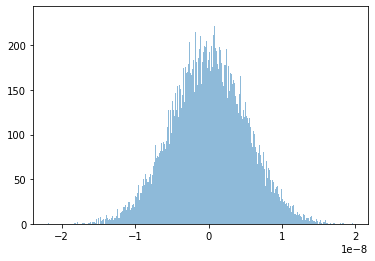

In [28]:
plt.hist(xstep0_arr, bins=1000, alpha=0.5)

In [113]:
#---------body of the code---------------------------
xv1=2000e-9                                #initial x cordinate in unit micro meter
yv1=2e-9                                  #initial y cordinate in unit micro meter
xarr_v1=[]                                #list of total x after ith step
yarr_v1=[]                                #list of total y after 
t_arr1=[]
xstep1_arr=[]

In [114]:
#---------body of the code---------------------------
xv=xv1
yv=yv1
xarr_v=xarr_v1
yarr_v=yarr_v1
t_arr=t_arr1
xstep_arr=xstep1_arr
time=time1
#D=5e-11

In [115]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [116]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0
#n=0

while t<tf:
    #--------------------maxwell part of the code
    p= -3 #uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    #n=n+1
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [117]:
xstep1_arr = Bx_arr

In [118]:
xstep1_arr=np.array(xstep1_arr)

In [119]:
xarr_v1=xarr_v
yarr_v1=yarr_v
t_arr1=t_arr

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,
          1.,   0.,   0.,   2.,   2.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   3.,   1.,
          1.,   1.,   2.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,
          2.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   2.,   0.,   1.,   1.,   5.,   2.,
          0.,   2.,   2.,   0.,   0.,   0.,   1.,   0.,   1.,   3.,   3.,
          5.,   0.,   1.,   3.,   0., 

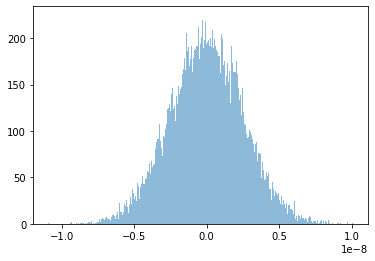

In [36]:
plt.hist(xstep1_arr, bins=1000, alpha=0.5)

In [97]:
#---------body of the code---------------------------
xv2=2000e-9                                   #initial x cordinate in unit micro meter
yv2=1000e-9                                #initial y cordinate in unit micro meter
xarr_v2=[]                                #list of total x after ith step
yarr_v2=[]                                #list of total y after 
t_arr2=[]
xstep2_arr=[]



In [98]:
#---------body of the code---------------------------
xv=xv2
yv=yv2
xarr_v=xarr_v2
yarr_v=yarr_v2
t_arr=t_arr2
xstep_arr=xstep2_arr
time=time2
#D=1e-11

In [99]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [100]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0
#n=0

while t<tf:
    #--------------------maxwell part of the code
    p= -3 #uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    #n=n+1
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [101]:
xstep2_arr = Bx_arr

In [102]:
xarr_v2=xarr_v
yarr_v2=yarr_v
t_arr2=t_arr

In [94]:
xstep2_arr=np.array(xstep2_arr)

(array([  1.,   0.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,
          0.,   0.,   2.,   0.,   2.,   1.,   0.,   0.,   1.,   2.,   1.,
          2.,   0.,   2.,   1.,   0.,   2.,   2.,   1.,   1.,   1.,   1.,
          1.,   2.,   0.,   3.,   1.,   0.,   0.,   3.,   4.,   0.,   0.,
          0.,   2.,   1.,   1.,   1.,   3.,   2.,   2.,   3.,   5.,   1.,
          3.,   2.,   2.,   2.,   1.,   2.,   3.,   0.,   2.,   2.,   2.,
          2.,   2.,   0.,   5.,   0.,   1.,   3.,   3.,   2.,   4.,   2.,
          5.,   4.,   7.,   4.,   5.,   5.,   3.,   5.,   8.,   2.,   4.,
          0.,   6.,   5.,   5.,   5.,   3.,   3.,   4.,   4.,   3.,   8.,
          6.,   6.,   9.,   7.,   3.,   9.,   8.,  14.,   7.,   8.,   8.,
         10.,  13.,  10.,   9.,   7., 

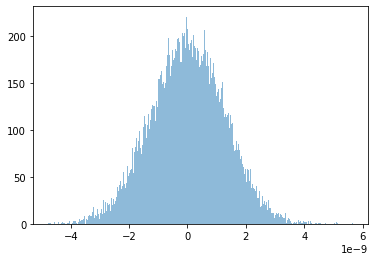

In [44]:
plt.hist(xstep2_arr, bins=1000, alpha=0.5)

In [122]:
#--------body of the code---------------------------
xv3=500e-9                                   #initial x cordinate in unit micro meter
yv3=1500e-9                                 #initial y cordinate in unit micro meter
xarr_v3=[]                                #list of total x after ith step
yarr_v3=[]                                #list of total y after 
t_arr3=[]
xstep3_arr=[]

In [123]:
#---------body of the code---------------------------
xv=xv3
yv=yv3
xarr_v=xarr_v3
yarr_v=yarr_v3
t_arr=t_arr3
xstep_arr=xstep3_arr
time=time3
#D=5e-10

In [124]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [125]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0
#n=0

while t<tf:
    #--------------------maxwell part of the code
    p= -3 #uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    #n=n+1
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [126]:
xstep3_arr = Bx_arr

In [127]:
xarr_v3=xarr_v
yarr_v3=yarr_v
t_arr3=t_arr

In [76]:
xstep3_arr=np.array(xstep3_arr)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   2., 

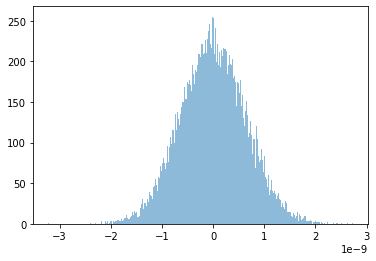

In [52]:
plt.hist(xstep3_arr, bins=1000, alpha=0.5)

In [105]:
#--------body of the code---------------------------
xv4=1000e-9                                   #initial x cordinate in unit micro meter
yv4=2000e-9                                 #initial y cordinate in unit micro meter
xarr_v4=[]                                #list of total x after ith step
yarr_v4=[]                                #list of total y after 
t_arr4=[]
xstep4_arr=[]

In [106]:
#---------body of the code---------------------------
xv=xv4
yv=yv4
xarr_v=xarr_v4
yarr_v=yarr_v4
t_arr=t_arr4
xstep_arr=xstep4_arr
time=time4
#D=1e-9

In [107]:
tau_t_arr=[]
Bx_arr=[]
Ax_arr=[]

In [108]:
tau_t=0
tf =  6e1                              #total time in unit second
t = 0
dt=0
#n=0

while t<tf:
    #--------------------maxwell part of the code
    p= -3 #uniform(-6,-2)
    
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    Dt=D*exp(alpha*(time+t))
    s=((2*Dt*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    
    xstep=(gauss(m,s))
    xv=xv+xstep
    xarr_v.append(xv)
    
    
    yv=yv+(gauss(m,s))
    yarr_v.append(yv)
    
    Bx_arr.append(xstep)
    t=t+dt
    t_arr.append(t)
    
    
    #n=n+1
    
xarr_v=np.array(xarr_v)
yarr_v=np.array(yarr_v)

In [109]:
xarr_v4=xarr_v
yarr_v4=yarr_v
t_arr4=t_arr

In [110]:
xstep4_arr = Bx_arr

In [59]:
xstep4_arr=np.array(xstep4_arr)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   3.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,
          0.,   1.,   0.,   0.,   1.,   1.,   2.,   0.,   1.,   1.,   1.,
          0.,   2.,   0.,   1.,   0.,   0.,   2.,   2.,   1.,   1.,   0.,
          1.,   2.,   1.,   4.,   1., 

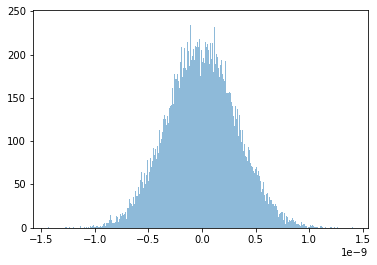

In [60]:
plt.hist(xstep4_arr, bins=1000, alpha=0.5)

In [61]:
from scipy import stats as ss

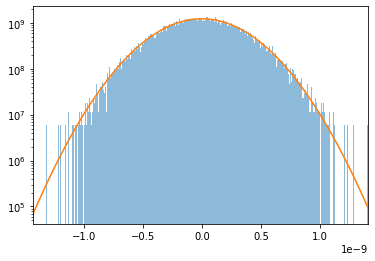

In [62]:
import matplotlib.mlab as mlab

arr=xstep4_arr

plt.hist(arr, density=True,bins=1000, alpha=0.5)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
x = np.linspace(min(arr), max(arr), 100)
plt.plot(x, ss.norm.pdf(x, mean, sigma))


#plt.xscale('log')
plt.yscale('log')
plt.show()


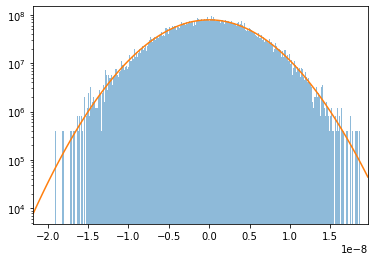

In [63]:
import matplotlib.mlab as mlab

arr=xstep0_arr

plt.hist(arr, density=True,bins=1000, alpha=0.5)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
x = np.linspace(min(arr), max(arr), 100)
plt.plot(x, ss.norm.pdf(x, mean, sigma))


#plt.xscale('log')
plt.yscale('log')
plt.show()

In [64]:
xarr_v0=np.array(xarr_v0)
yarr_v0=np.array(yarr_v0)

In [120]:
xarr_v1=np.array(xarr_v1)
yarr_v1=np.array(yarr_v1)

In [103]:
xarr_v2=np.array(xarr_v2)
yarr_v2=np.array(yarr_v2)

In [128]:
xarr_v3=np.array(xarr_v3)
yarr_v3=np.array(yarr_v3)

In [111]:
xarr_v4=np.array(xarr_v4)
yarr_v4=np.array(yarr_v4)

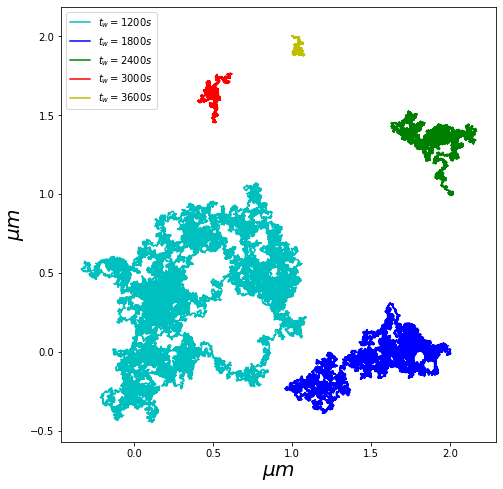

In [129]:
from pylab import rcParams
rcParams ['figure.figsize']=8,8
plt.plot(xarr_v0*1e6,yarr_v0*1e6,'c', label=r'$t_w = 1200 s$')
plt.plot(xarr_v1*1e6,yarr_v1*1e6,'b', label=r'$t_w = 1800 s$')
plt.plot(xarr_v2*1e6,yarr_v2*1e6,'g', label=r'$t_w = 2400 s$')
plt.plot(xarr_v3*1e6,yarr_v3*1e6,'r', label=r'$t_w = 3000 s$')
plt.plot(xarr_v4*1e6,yarr_v4*1e6,'y', label=r'$t_w = 3600 s$')

#plt.plot(xarr_v2[0],yarr_v2[0], 'ro')
#plt.plot(xarr_v3[0],yarr_v3[0], 'yo')
plt.legend(loc="upper left")
plt.ylabel(r'$\mu m$', size=20)
plt.xlabel(r'$\mu m$', size=20)
plt.axis('square')
plt.show()

(-253.130148223262, 739.6222447307988, -106.71375107678111, 886.0386418772797)

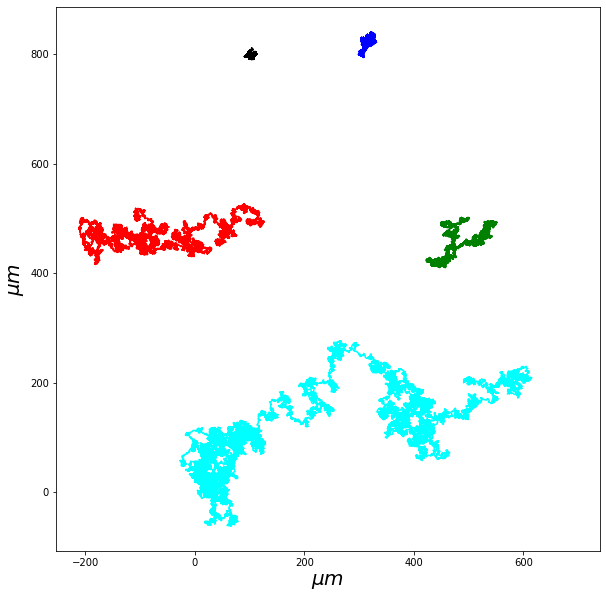

In [105]:
from pylab import rcParams
rcParams ['figure.figsize']=10,10
plt.plot(xarr_v0[:30000]*1e6,yarr_v0[:30000]*1e6,'black')
plt.plot(xarr_v1[:30000]*1e6,yarr_v1[:30000]*1e6,'blue')
plt.plot(xarr_v2[:30000]*1e6,yarr_v2[:30000]*1e6,'green')
plt.plot(xarr_v3[:30000]*1e6,yarr_v3[:30000]*1e6,'red')
plt.plot(xarr_v4[:30000]*1e6,yarr_v4[:30000]*1e6,'cyan')

#plt.plot(xarr_v2[0],yarr_v2[0], 'ro')
#plt.plot(xarr_v3[0],yarr_v3[0], 'yo')

plt.ylabel(r'$\mu m$', size=20)
plt.xlabel(r'$\mu m$', size=20)
plt.axis('square')

In [66]:
'''from pylab import rcParams
rcParams ['figure.figsize']=6,6
#plt.plot(xarr_v1,yarr_v1,'blue')
plt.plot(xarr_v2,yarr_v2,'green')
plt.plot(xarr_v1[0],yarr_v1[0], 'ro')
plt.plot(xarr_v1[-1],yarr_v1[-1], 'yo')

#plt.ylabel(r'$\mu m$', size=20)
#plt.xlabel(r'$\mu m$', size=20)
plt.axis('square')
plt.show()'''

"from pylab import rcParams\nrcParams ['figure.figsize']=6,6\n#plt.plot(xarr_v1,yarr_v1,'blue')\nplt.plot(xarr_v2,yarr_v2,'green')\nplt.plot(xarr_v1[0],yarr_v1[0], 'ro')\nplt.plot(xarr_v1[-1],yarr_v1[-1], 'yo')\n\n#plt.ylabel(r'$\\mu m$', size=20)\n#plt.xlabel(r'$\\mu m$', size=20)\nplt.axis('square')\nplt.show()"

In [130]:
np.savetxt('98.txt',xarr_v0)
np.savetxt('99.txt',yarr_v0)
np.savetxt('100.txt',t_arr0)

In [131]:
np.savetxt('101.txt',xarr_v1)
np.savetxt('102.txt',yarr_v1)
np.savetxt('103.txt',t_arr1)

In [132]:
np.savetxt('104.txt',xarr_v2)
np.savetxt('105.txt',yarr_v2)
np.savetxt('106.txt',t_arr2)

In [133]:
np.savetxt('107.txt',xarr_v3)
np.savetxt('108.txt',yarr_v3)
np.savetxt('109.txt',t_arr3)

In [134]:
np.savetxt('110.txt',xarr_v4)
np.savetxt('111.txt',yarr_v4)
np.savetxt('112.txt',t_arr4)

In [72]:
len(xarr_v)

60001

In [150]:
from scipy.stats import t

In [151]:
t(10,0)

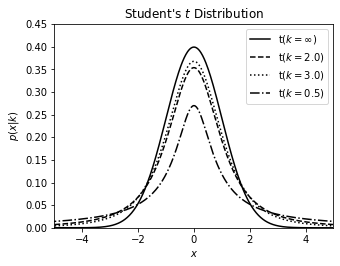

In [153]:
# Define the distribution parameters to be plotted
mu = 0
k_values = [1E10, 2, 3, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for k, ls in zip(k_values, linestyles):
    dist = t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='black', label=label)

plt.xlim(-5, 5)
plt.ylim(0.0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")
#plt.yscale('log')
plt.legend()
plt.show()



In [76]:
#np.random.standard_t(df=1e6)

0.6700635029243667

In [77]:
gauss(0,10000)

-10422.75525226527

In [133]:
ts= np.arange(1200,1260,0.10)

In [134]:
ft =np.exp(alpha*(ts))

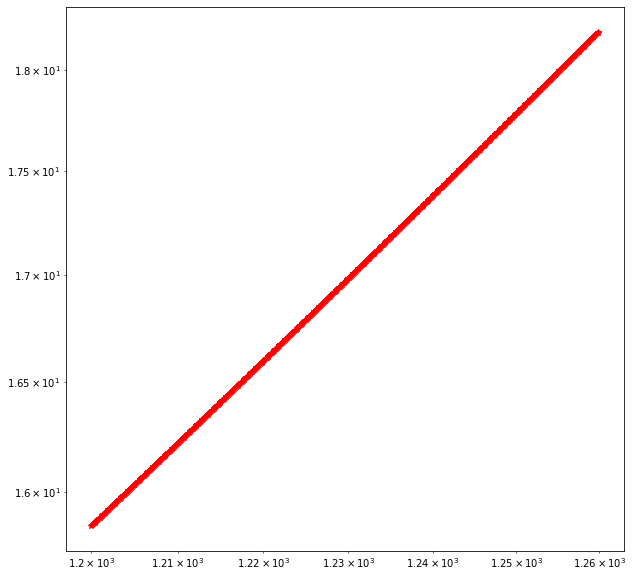

In [135]:
plt.plot(ts,ft, 'r*')
plt.xscale('log')
plt.yscale('log')